In [1]:
# I had issues installing soccerplots so i ran the commands commented out below, restarted the Kernel, and it worked
# https://stackoverflow.com/questions/42321784/jupyter-modulenotfounderror-no-module-named-matplotlib


# import sys  
# !{sys.executable} -m pip install --user soccerplots

In [1]:
# Install needed modules

import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [2]:
# read the GcExport.csv in the data folder
# skip the first row since it's not needed

gc_stats = pd.read_csv('data/ERMS.csv', skiprows=1)

In [3]:
# drop the rows with NaN values and assign to gc_stats_pitching_na
# this should remove the Totals row and the row with stat descriptions, leaving only player rows

gc_stats = gc_stats.dropna()

# change the Innings Pitched (IP) column to numeric

gc_stats["IP"] = pd.to_numeric(gc_stats["IP"])
gc_stats["ERA"] = pd.to_numeric(gc_stats["ERA"])
gc_stats["SO.1"] = pd.to_numeric(gc_stats["SO.1"])
gc_stats["WHIP"] = pd.to_numeric(gc_stats["WHIP"])
gc_stats["BB.1"] = pd.to_numeric(gc_stats["BB.1"])
# gc_stats["BAA"] = pd.to_numeric(gc_stats["BAA"])
gc_stats["FIP"] = pd.to_numeric(gc_stats["FIP"])
gc_stats["BABIP.1"] = pd.to_numeric(gc_stats["BABIP.1"])
gc_stats["BA/RISP.1"] = pd.to_numeric(gc_stats["BA/RISP.1"])

In [4]:
# creating a new dataframe named gc_stats_pitchers
# using .drop() to select all rows but drop the batting columns

gc_stats_pitching = gc_stats.drop(gc_stats.iloc[:, 3:54], axis = 1)

In [5]:
# make a new dataframe with only players who have innings pitched greater than 0

gc_stats_IP = gc_stats_pitching[gc_stats_pitching["IP"] != 0]

In [6]:
# new dataframe with only the columns we need for the radar chart
# also using .reset_index to clean it up

gc_stats_pitchers_only = gc_stats_IP[["Number", "Last", "First", "IP", "ERA", "SO.1", "WHIP", "BB.1", "FIP", "BABIP.1", "BA/RISP.1"]].reset_index()
gc_stats_pitchers_only

,index,Number,Last,First,IP,ERA,SO.1,WHIP,BB.1,FIP,BABIP.1,BA/RISP.1
0,4,12,Ghee,Harlee,7.0,9.00,6,2.857,4,3.120,0.500,0.368
1,8,23,Luttrell,Rebecca,5.1,5.25,6,2.250,6,4.009,0.333,0.273


In [7]:
#get parameters
params = list(gc_stats_pitchers_only.columns)
params = params[4:]
params

['IP', 'ERA', 'SO.1', 'WHIP', 'BB.1', 'FIP', 'BABIP.1', 'BA/RISP.1']

In [8]:
#add ranges to list of tuple pairs
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(gc_stats_pitchers_only[params][x])
    a = a - (a*.25)
    
    b = max(gc_stats_pitchers_only[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b))
    
for x in range(len(gc_stats_pitchers_only['First'])):
    if gc_stats_pitchers_only['First'][x] == 'Harlee':
        a_values = gc_stats_pitchers_only.iloc[x].values.tolist()
    if gc_stats_pitchers_only['First'][x] == 'Rebecca':
        b_values = gc_stats_pitchers_only.iloc[x].values.tolist()
        
a_values = a_values[4:]
b_values = b_values[4:]

values = [a_values,b_values]

In [9]:
#title 

title = dict(
    title_name='Harlee',
    title_color = 'red',
    subtitle_name = 'ERMS',
    subtitle_color = 'red',
    title_name_2='Rebecca',
    title_color_2 = 'blue',
    subtitle_name_2 = 'ERMS',
    subtitle_color_2 = 'blue',
    title_fontsize = 18,
    subtitle_fontsize=15
)

endnote = 'Game Changer Data Export'

findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


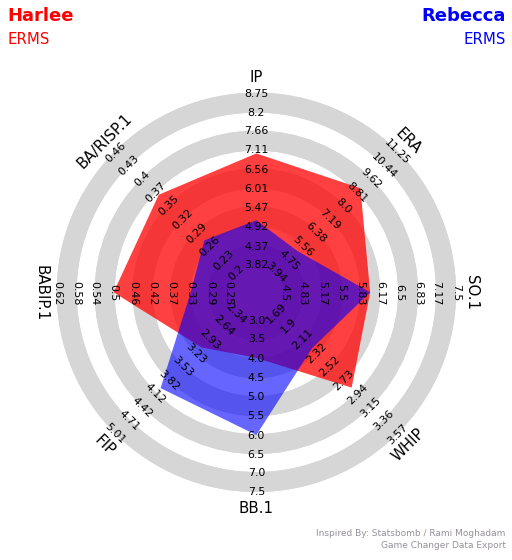

In [13]:
radar = Radar(label_fontsize=15, range_fontsize=11)

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['red','blue'],
                         alphas=[.75,.6],title=title,endnote=endnote,
                         compare=True)